# 权重衰减

权重衰减是最广泛使用的正则化的技术之一

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

像以前一样生成一些数据
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2)$$

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

初始化模型参数

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

定义$L_2$范数惩罚

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

定义训练代码实现

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

忽略正则化直接训练

w的L2范数是： 13.076693534851074


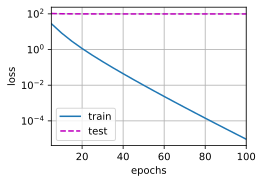

In [6]:
train(lambd=0)

使用权重衰减

w的L2范数是： 0.373807430267334


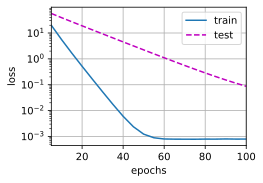

In [7]:
train(lambd=3)

简洁实现

In [30]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD(net.parameters(), lr=lr,
                              weight_decay=wd)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

这些图看起来和我们从零开始实现权重衰减时的图相同

w的L2范数： 12.773503303527832


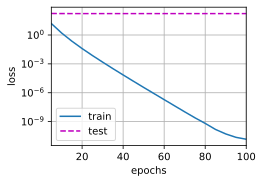

In [9]:
train_concise(0)

w的L2范数： 0.37925341725349426


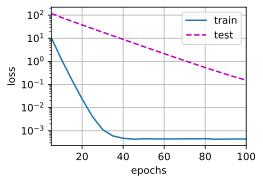

In [31]:
train_concise(3)

## 练习

In [35]:
def l1_penalty(w):
    # torch.abs(w).sum
    # torch.norm(w, 1)
    return torch.sum(torch.abs(w))

In [12]:
def train_l1(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 0.0727059543132782


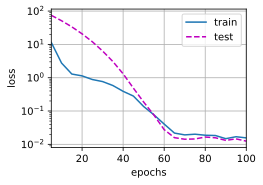

In [36]:
train_l1(3)

w的L2范数是： 0.12533092498779297


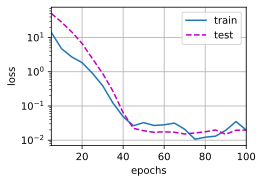

In [37]:
train_l1(5)

w的L2范数是： 0.04820745810866356


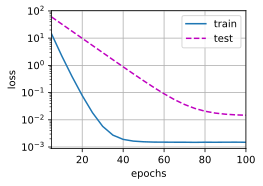

In [16]:
train(5)

w的L2范数是： 0.0290216114372015


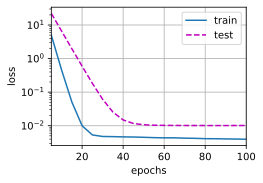

In [17]:
train(10)

w的L2范数： 0.03591363877058029


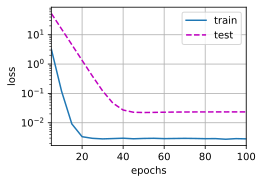

In [32]:
train_concise(10)

w的L2范数： 0.026622368022799492


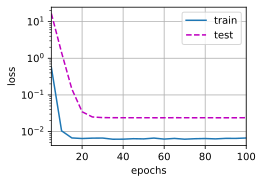

In [33]:
train_concise(20)

w的L2范数： 0.023599904030561447


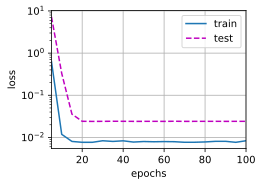

In [34]:
train_concise(25)